In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

,OBJECTID,UVID,BOUWWERKCO,AFSTOOTSTA,Shape_Leng,Shape_Area,EAN,geometry
0,2,8NF-W7M-MMJG-HQ1,6221AC125_01,nietinafstoting,272.393826,2917.962565,EAN_871690421364903296,"POLYGON Z ((177229.538 317262.078 0, 177256.05..."
1,3,H3P-SBD-MNG1-EEY,3313K25_01,nietinafstoting,885.742739,7680.699429,EAN_871689276000063698,"POLYGON Z ((108347.993 425810.848 0, 108356.65..."
2,4,T10-8K4-S2KB-5F3,7334LVW490_02,nietinafstoting,244.542108,1363.906093,EAN_871687110001854256,"POLYGON Z ((194192.907 465709.195 0, 194258.20..."
3,5,12T-GT1-86ZY-68R,2515R50_01,nietinafstoting,329.932221,2322.523005,EAN_871689200000013384,"POLYGON Z ((82000.798 455304.865 0, 82000.646 ..."
4,6,EAP-AJC-PVF1-3AP,2511T147_01,nietinafstoting,364.144225,5020.276578,EAN_871689200008171789,"POLYGON Z ((82030.926 455069.13 0, 82004.844 4..."


Index(['OBJECTID', 'UVID', 'BOUWWERKCO', 'AFSTOOTSTA', 'Shape_Leng',
       'Shape_Area', 'EAN', 'geometry'],
      dtype='object')
EPSG:28992


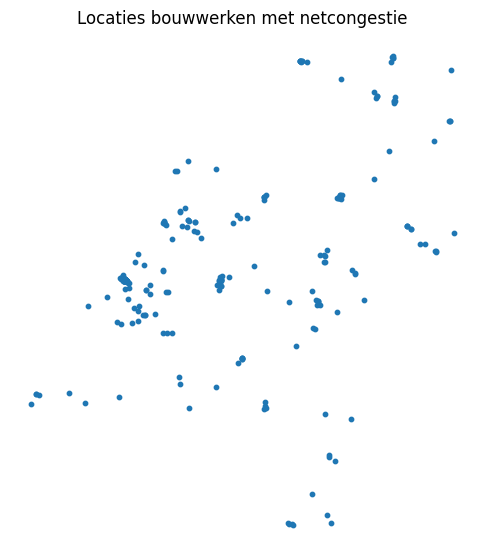

In [2]:

gdf = gpd.read_file("Bouwwerken_netcongestie_data/Bouwwerken_netcongestie.shp")

display(gdf.head())       # first rows
print(gdf.columns)      # list of all attribute columns
print(gdf.crs)          # coordinate reference system


# Use centroids as points
points = gdf.copy()
points["geometry"] = points.geometry.centroid

fig, ax = plt.subplots(figsize=(6, 8))
points.plot(ax=ax, markersize=10)  # big dots so you can see them
ax.set_title("Locaties bouwwerken met netcongestie")
ax.set_axis_off()
plt.show()

Bouwwerken shapefile:


,OBJECTID,UVID,BOUWWERKCO,AFSTOOTSTA,Shape_Leng,Shape_Area,EAN,geometry
0,2,8NF-W7M-MMJG-HQ1,6221AC125_01,nietinafstoting,272.393826,2917.962565,EAN_871690421364903296,"POLYGON Z ((177229.538 317262.078 0, 177256.05..."
1,3,H3P-SBD-MNG1-EEY,3313K25_01,nietinafstoting,885.742739,7680.699429,EAN_871689276000063698,"POLYGON Z ((108347.993 425810.848 0, 108356.65..."
2,4,T10-8K4-S2KB-5F3,7334LVW490_02,nietinafstoting,244.542108,1363.906093,EAN_871687110001854256,"POLYGON Z ((194192.907 465709.195 0, 194258.20..."
3,5,12T-GT1-86ZY-68R,2515R50_01,nietinafstoting,329.932221,2322.523005,EAN_871689200000013384,"POLYGON Z ((82000.798 455304.865 0, 82000.646 ..."
4,6,EAP-AJC-PVF1-3AP,2511T147_01,nietinafstoting,364.144225,5020.276578,EAN_871689200008171789,"POLYGON Z ((82030.926 455069.13 0, 82004.844 4..."


Columns: ['OBJECTID', 'UVID', 'BOUWWERKCO', 'AFSTOOTSTA', 'Shape_Leng', 'Shape_Area', 'EAN', 'geometry']
CRS (gdf): EPSG:28992

Netherlands 1km shapefile (first rows):


,CELLCODE,EOFORIGIN,NOFORIGIN,geometry
0,1kmE3793N3217,3793000,3217000,"POLYGON ((3793000 3217000, 3793000 3218000, 37..."
1,1kmE3793N3218,3793000,3218000,"POLYGON ((3793000 3218000, 3793000 3219000, 37..."
2,1kmE3793N3219,3793000,3219000,"POLYGON ((3793000 3219000, 3793000 3220000, 37..."
3,1kmE3793N3220,3793000,3220000,"POLYGON ((3793000 3220000, 3793000 3221000, 37..."
4,1kmE3793N3221,3793000,3221000,"POLYGON ((3793000 3221000, 3793000 3222000, 37..."


Columns: ['CELLCODE', 'EOFORIGIN', 'NOFORIGIN', 'geometry']
CRS (nl): EPSG:3035


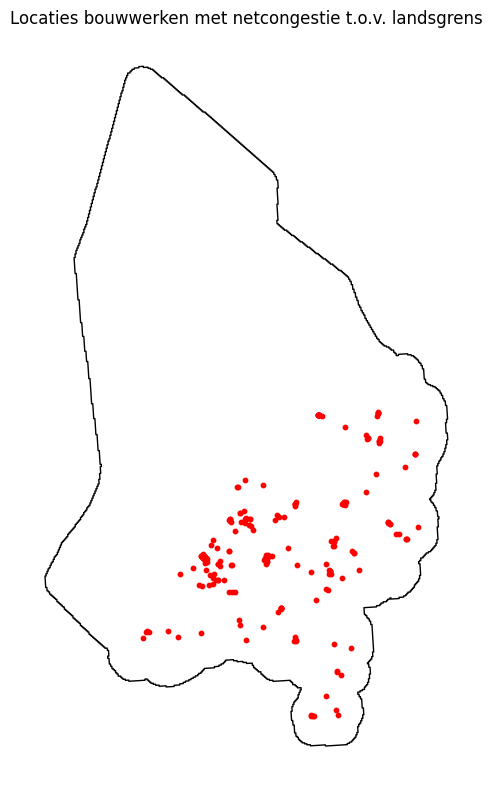

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import display

# Read  buildings shapefile
gdf = gpd.read_file("Bouwwerken_netcongestie_data/Bouwwerken_netcongestie.shp")

print("Bouwwerken shapefile:")
display(gdf.head())       # first rows
print("Columns:", gdf.columns.tolist())
print("CRS (gdf):", gdf.crs)

# Read the Netherlands 1 km shapefile

nl = gpd.read_file("Netherlands_shapefile/nl_1km.shp")

print("\nNetherlands 1km shapefile (first rows):")
display(nl.head())
print("Columns:", nl.columns.tolist())
print("CRS (nl):", nl.crs)

#  Make sure NL is in the same CRS as the buildings
if nl.crs is None:
    nl = nl.set_crs(gdf.crs)
elif nl.crs != gdf.crs:
    nl = nl.to_crs(gdf.crs)

#  Create only the outer border of the Netherlands

nl_dissolved = nl.dissolve()          # single (multi)polygon
nl_border = nl_dissolved.boundary     # just the outline

# .  centroids of  building polygons as points
points = gdf.copy()
points["geometry"] = points.geometry.centroid



fig, ax = plt.subplots(figsize=(6, 8))

# Plot ONLY the Netherlands outer border
nl_border.plot(ax=ax, edgecolor="black", linewidth=1)

# Plot your buildings as red dots on top
points.plot(ax=ax, markersize=10, color="red")

ax.set_aspect("equal")  # keep correct proportions
ax.set_title("Locaties bouwwerken met netcongestie t.o.v. landsgrens")
ax.set_axis_off()

plt.tight_layout()
plt.show()


C:\Users\tobia\AppData\Local\Temp\ipykernel_73276\1814822559.py:245: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.93])


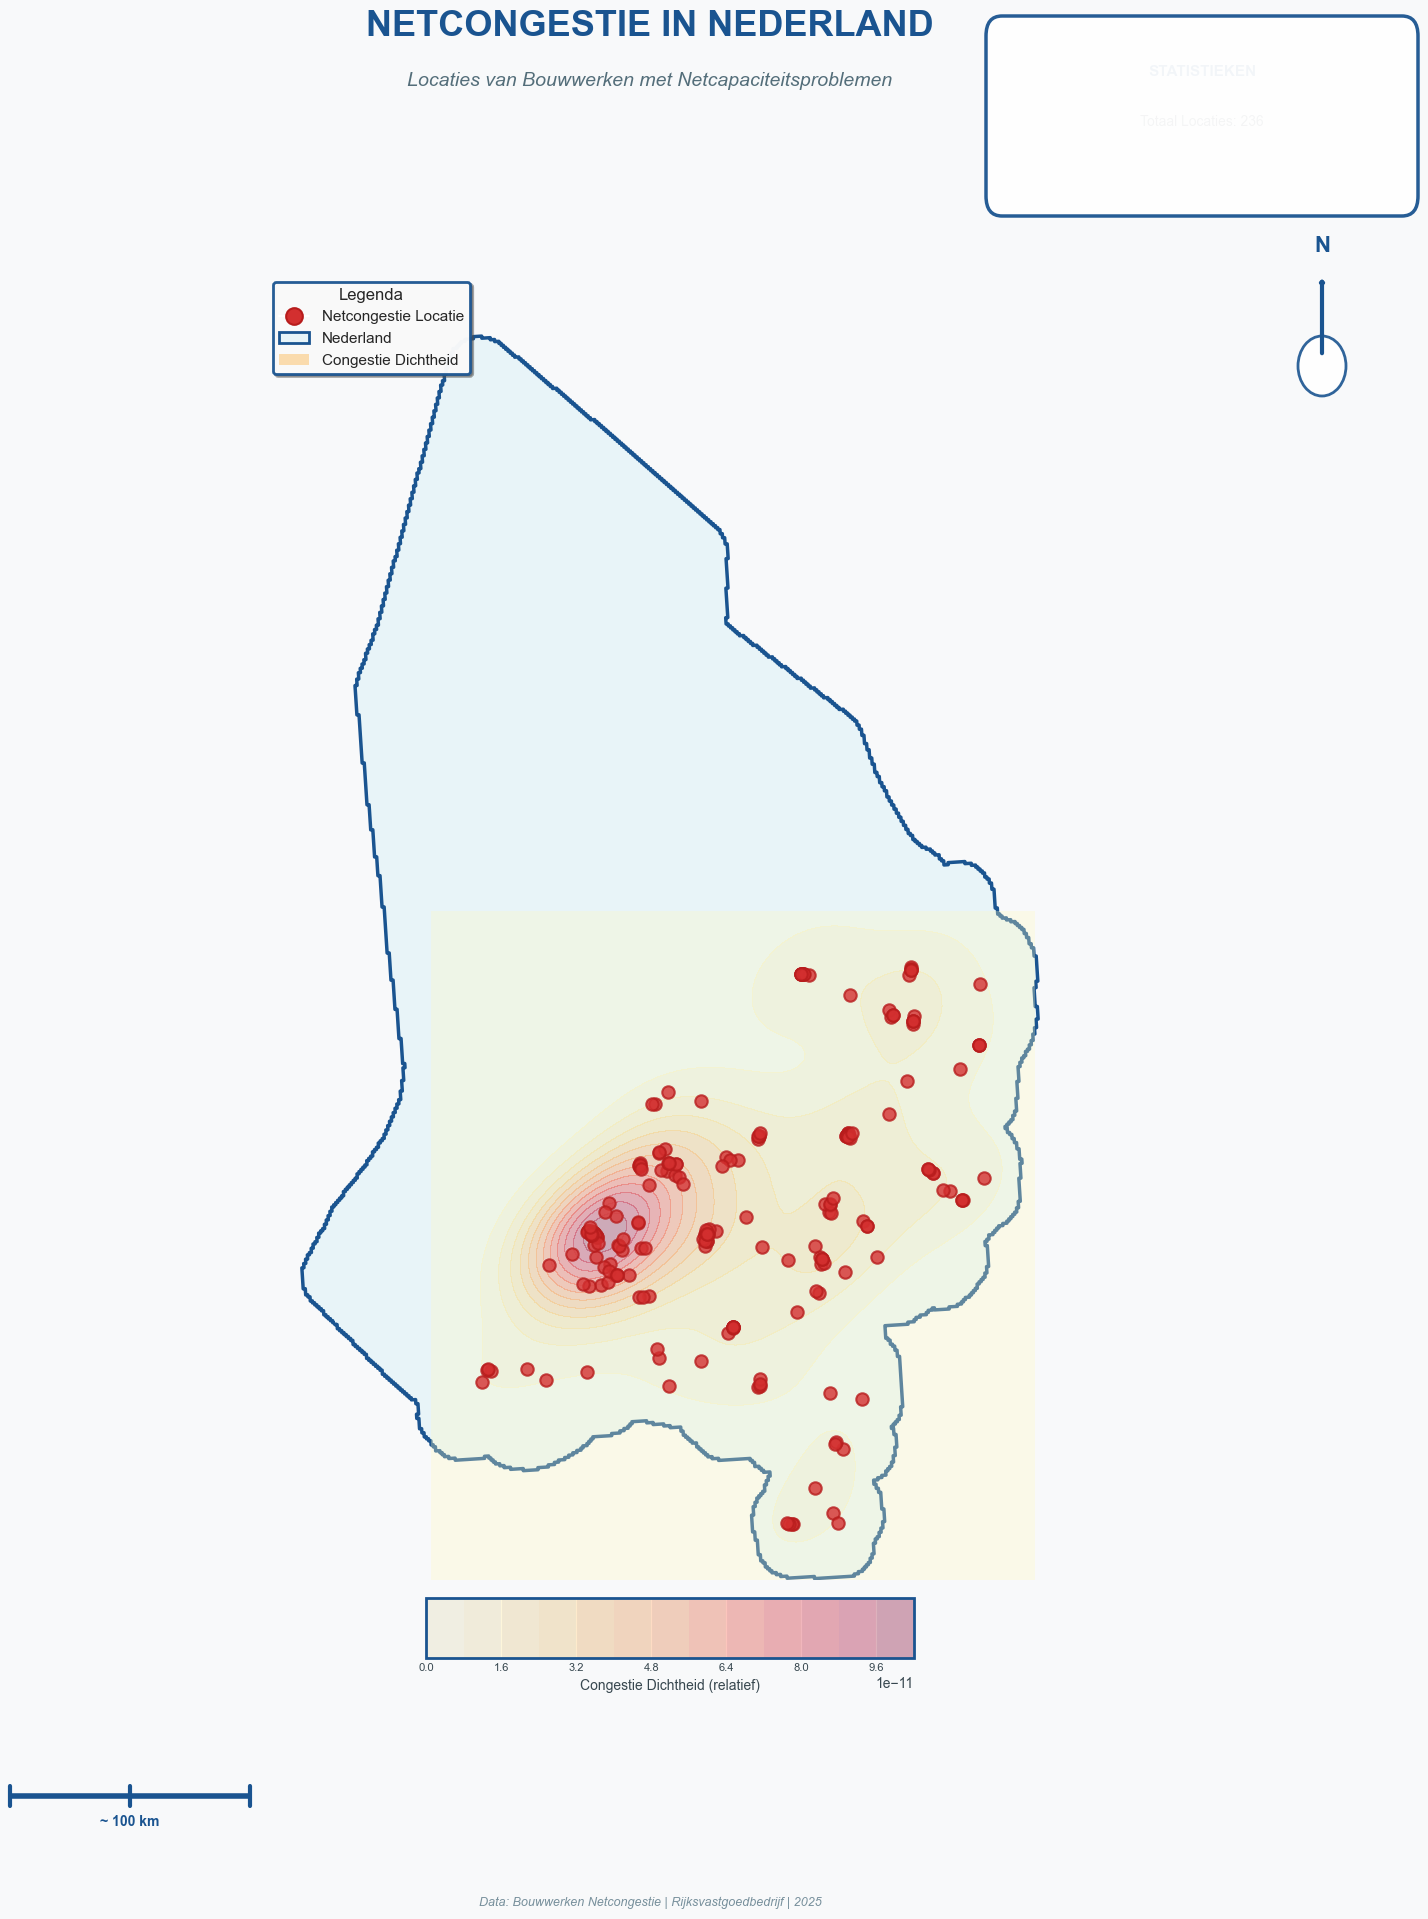


NETCONGESTIE VISUALISATIE - NEDERLAND
Totaal aantal geïdentificeerde locaties: 236
Data bestand: Bouwwerken_netcongestie.shp


In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, Circle, FancyArrowPatch
from matplotlib.lines import Line2D
import numpy as np
from scipy.stats import gaussian_kde

# Set style for professional appearance
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

# Read the data
gdf = gpd.read_file("Bouwwerken_netcongestie_data/Bouwwerken_netcongestie.shp")
nl = gpd.read_file("Netherlands_shapefile/nl_1km.shp")

# Ensure same CRS
if nl.crs is None:
    nl = nl.set_crs(gdf.crs)
elif nl.crs != gdf.crs:
    nl = nl.to_crs(gdf.crs)

# Create Netherlands outline
nl_dissolved = nl.dissolve()

# Convert building polygons to centroids
points = gdf.copy()
points["geometry"] = points.geometry.centroid

# Create figure with subplots
fig = plt.figure(figsize=(16, 20), facecolor='#f8f9fa')
gs = fig.add_gridspec(20, 20, hspace=0.3, wspace=0.3)

# Main map
ax_main = fig.add_subplot(gs[1:18, 1:19])

# ============ MAIN MAP VISUALIZATION ============

# Create a gradient background effect
nl_dissolved.plot(ax=ax_main, 
                  facecolor='#e8f4f8',
                  edgecolor='none',
                  alpha=1.0,
                  zorder=1)

# Add subtle grid overlay for Netherlands
nl_dissolved.boundary.plot(ax=ax_main,
                          edgecolor='#1a5490',
                          linewidth=2.5,
                          zorder=2)

# Create density visualization using kernel density estimation
coords = np.array([[geom.x, geom.y] for geom in points.geometry])
if len(coords) > 1:
    kde = gaussian_kde(coords.T)
    
    # Create grid for density
    xmin, xmax = coords[:, 0].min(), coords[:, 0].max()
    ymin, ymax = coords[:, 1].min(), coords[:, 1].max()
    
    # Expand bounds slightly
    x_range = xmax - xmin
    y_range = ymax - ymin
    xmin -= x_range * 0.1
    xmax += x_range * 0.1
    ymin -= y_range * 0.1
    ymax += y_range * 0.1
    
    xi, yi = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    zi = kde(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot density as contour
    contour = ax_main.contourf(xi, yi, zi.reshape(xi.shape), 
                              levels=15,
                              cmap='YlOrRd',
                              alpha=0.3,
                              zorder=3)

# Plot the congestion points with enhanced styling
points.plot(ax=ax_main, 
           markersize=80, 
           color='#d32f2f',
           alpha=0.8,
           edgecolor='#b71c1c',
           linewidth=1.5,
           zorder=5)

# Add white glow effect around points
points.plot(ax=ax_main,
           markersize=100,
           color='white',
           alpha=0.3,
           edgecolor='none',
           zorder=4)

# ============ STYLING ============
ax_main.set_aspect('equal')
ax_main.set_axis_off()

# Add decorative border
for spine in ax_main.spines.values():
    spine.set_edgecolor('#1a5490')
    spine.set_linewidth(3)
    spine.set_visible(True)

# ============ TITLE AND HEADERS ============
title_text = 'NETCONGESTIE IN NEDERLAND'
subtitle_text = 'Locaties van Bouwwerken met Netcapaciteitsproblemen'

fig.text(0.5, 0.96, title_text, 
         fontsize=26, 
         fontweight='bold',
         ha='center',
         color='#1a5490',
         family='sans-serif')

fig.text(0.5, 0.935, subtitle_text,
         fontsize=14,
         ha='center',
         color='#546e7a',
         style='italic')

# ============ LEGEND ============
legend_elements = [
    Line2D([0], [0], marker='o', color='w', 
           markerfacecolor='#d32f2f', markersize=12, 
           markeredgecolor='#b71c1c', markeredgewidth=1.5,
           label='Netcongestie Locatie'),
    mpatches.Patch(facecolor='#e8f4f8', edgecolor='#1a5490', 
                   linewidth=2, label='Nederland'),
    mpatches.Patch(facecolor='#ff9800', alpha=0.3, 
                   edgecolor='none', label='Congestie Dichtheid')
]

legend = ax_main.legend(handles=legend_elements,
                       loc='upper left',
                       fontsize=11,
                       frameon=True,
                       fancybox=True,
                       shadow=True,
                       framealpha=0.95,
                       edgecolor='#1a5490',
                       title='Legenda',
                       title_fontsize=12)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_linewidth(2)

# ============ STATISTICS BOX ============
total_points = len(points)
stats_box = FancyBboxPatch((0.72, 0.88), 0.25, 0.08,
                          transform=fig.transFigure,
                          boxstyle="round,pad=0.01",
                          facecolor='white',
                          edgecolor='#1a5490',
                          linewidth=2.5,
                          alpha=0.95,
                          zorder=100)
fig.add_artist(stats_box)

fig.text(0.845, 0.94, 'STATISTIEKEN', 
         fontsize=11, 
         fontweight='bold',
         ha='center',
         color='#1a5490')

fig.text(0.845, 0.915, f'Totaal Locaties: {total_points}',
         fontsize=10,
         ha='center',
         color='#37474f')

# ============ NORTH ARROW ============
# Add north arrow
arrow_x, arrow_y = 0.92, 0.80
arrow = FancyArrowPatch((arrow_x, arrow_y), (arrow_x, arrow_y + 0.04),
                       transform=fig.transFigure,
                       arrowstyle='->,head_width=0.8,head_length=0.8',
                       color='#1a5490',
                       linewidth=3,
                       zorder=100)
fig.add_artist(arrow)

fig.text(arrow_x, arrow_y + 0.05, 'N',
         fontsize=16,
         fontweight='bold',
         ha='center',
         va='bottom',
         color='#1a5490',
         transform=fig.transFigure)

# Add compass circle
compass_circle = Circle((arrow_x, arrow_y - 0.005), 0.015,
                       transform=fig.transFigure,
                       facecolor='white',
                       edgecolor='#1a5490',
                       linewidth=2,
                       alpha=0.9,
                       zorder=99)
fig.add_artist(compass_circle)

# ============ SCALE BAR ============
# Approximate scale bar (rough estimate for Netherlands)
scale_x = 0.1
scale_y = 0.08
scale_length = 0.15  # relative to figure

scale_bar = Line2D([scale_x, scale_x + scale_length], [scale_y, scale_y],
                  transform=fig.transFigure,
                  color='#1a5490',
                  linewidth=4,
                  solid_capstyle='butt')
fig.add_artist(scale_bar)

# Add scale bar ticks
for i, x_pos in enumerate([scale_x, scale_x + scale_length/2, scale_x + scale_length]):
    tick = Line2D([x_pos, x_pos], [scale_y - 0.005, scale_y + 0.005],
                 transform=fig.transFigure,
                 color='#1a5490',
                 linewidth=3)
    fig.add_artist(tick)

fig.text(scale_x + scale_length/2, scale_y - 0.015, '~ 100 km',
         fontsize=10,
         ha='center',
         color='#1a5490',
         fontweight='bold',
         transform=fig.transFigure)

# ============ DATA SOURCE AND DATE ============
fig.text(0.5, 0.025, 'Data: Bouwwerken Netcongestie | Rijksvastgoedbedrijf | 2025',
         fontsize=9,
         ha='center',
         color='#78909c',
         style='italic')

# ============ COLOR BAR for Density ============
if len(coords) > 1:
    cbar_ax = fig.add_subplot(gs[18:19, 6:14])
    cbar = plt.colorbar(contour, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Congestie Dichtheid (relatief)', fontsize=10, color='#37474f')
    cbar.ax.tick_params(labelsize=8, colors='#37474f')
    cbar.outline.set_edgecolor('#1a5490')
    cbar.outline.set_linewidth(2)

plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()

print(f"\n{'='*60}")
print(f"NETCONGESTIE VISUALISATIE - NEDERLAND")
print(f"{'='*60}")
print(f"Totaal aantal geïdentificeerde locaties: {total_points}")
print(f"Data bestand: Bouwwerken_netcongestie.shp")
print(f"{'='*60}")

In [5]:
import folium
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster, MiniMap, Fullscreen, MeasureControl
import geopandas as gpd
import pandas as pd
import webbrowser
import os

# Read the data
gdf = gpd.read_file("Bouwwerken_netcongestie_data/Bouwwerken_netcongestie.shp")

# Convert to WGS84 (required for Folium)
gdf_wgs84 = gdf.to_crs(epsg=4326)

# Get centroids
points = gdf_wgs84.copy()
points["geometry"] = points.geometry.centroid

# Calculate center of Netherlands for map initialization
center_lat = points.geometry.y.mean()
center_lon = points.geometry.x.mean()

# Create base map with custom styling
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=7,
    tiles=None,  # We'll add custom tiles
    control_scale=True,
    prefer_canvas=True
)

# Add multiple tile layers for user selection
folium.TileLayer(
    'CartoDB positron',
    name='Light Map',
    attr='CartoDB'
).add_to(m)

folium.TileLayer(
    'OpenStreetMap',
    name='Street Map',
    attr='OpenStreetMap'
).add_to(m)

folium.TileLayer(
    'CartoDB dark_matter',
    name='Dark Map',
    attr='CartoDB'
).add_to(m)

folium.TileLayer(
    'Stamen Terrain',
    name='Terrain',
    attr='Stamen'
).add_to(m)

# Create feature groups for different layers
marker_cluster_group = folium.FeatureGroup(name='📍 Clustered Points', show=True)
individual_markers_group = folium.FeatureGroup(name='📌 Individual Points', show=False)
heatmap_group = folium.FeatureGroup(name='🔥 Heat Map', show=True)

# ============ ADD MARKER CLUSTER ============
marker_cluster = MarkerCluster(
    name='Netcongestie Cluster',
    overlay=True,
    control=True,
    icon_create_function=None
).add_to(marker_cluster_group)

# Add markers to cluster with popups
for idx, row in points.iterrows():
    # Create popup content with available attributes
    popup_html = f"""
    <div style="font-family: Arial, sans-serif; width: 250px;">
        <h4 style="color: #1a5490; margin-bottom: 10px; border-bottom: 2px solid #1a5490;">
            Netcongestie Locatie
        </h4>
        <table style="width: 100%; font-size: 12px;">
            <tr>
                <td style="padding: 4px;"><b>Locatie ID:</b></td>
                <td style="padding: 4px;">{idx}</td>
            </tr>
            <tr>
                <td style="padding: 4px;"><b>Latitude:</b></td>
                <td style="padding: 4px;">{row.geometry.y:.6f}</td>
            </tr>
            <tr>
                <td style="padding: 4px;"><b>Longitude:</b></td>
                <td style="padding: 4px;">{row.geometry.x:.6f}</td>
            </tr>
        </table>
    </div>
    """
    
    # Add additional attributes if they exist
    attr_html = ""
    for col in gdf.columns:
        if col != 'geometry' and pd.notna(row.get(col)):
            attr_html += f"""
            <tr>
                <td style="padding: 4px;"><b>{col}:</b></td>
                <td style="padding: 4px;">{row.get(col)}</td>
            </tr>
            """
    
    if attr_html:
        popup_html = popup_html.replace("</table>", attr_html + "</table>")
    
    # Create custom icon
    icon = folium.Icon(
        color='red',
        icon='bolt',
        prefix='fa'
    )
    
    # Add to cluster
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(popup_html, max_width=300),
        tooltip=f"Locatie #{idx}",
        icon=icon
    ).add_to(marker_cluster)
    
    # Also add to individual markers group (hidden by default)
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=8,
        popup=folium.Popup(popup_html, max_width=300),
        tooltip=f"Locatie #{idx}",
        color='#b71c1c',
        fillColor='#d32f2f',
        fillOpacity=0.7,
        weight=2
    ).add_to(individual_markers_group)

# ============ ADD HEAT MAP ============
heat_data = [[point.y, point.x] for point in points.geometry]

HeatMap(
    heat_data,
    name='Heat Map',
    min_opacity=0.3,
    max_opacity=0.8,
    radius=25,
    blur=20,
    gradient={
        0.0: 'blue',
        0.3: 'lime',
        0.5: 'yellow',
        0.7: 'orange',
        1.0: 'red'
    }
).add_to(heatmap_group)

# Add feature groups to map
marker_cluster_group.add_to(m)
individual_markers_group.add_to(m)
heatmap_group.add_to(m)

# ============ ADD NETHERLANDS BOUNDARY ============
# Add Netherlands outline
nl = gpd.read_file("Netherlands_shapefile/nl_1km.shp")
nl_wgs84 = nl.to_crs(epsg=4326)
nl_dissolved = nl_wgs84.dissolve()

boundary_group = folium.FeatureGroup(name='🗺️ Netherlands Boundary', show=True)

folium.GeoJson(
    nl_dissolved,
    name='Netherlands',
    style_function=lambda x: {
        'fillColor': 'transparent',
        'color': '#1a5490',
        'weight': 3,
        'fillOpacity': 0
    }
).add_to(boundary_group)

boundary_group.add_to(m)

# ============ ADD PLUGINS AND CONTROLS ============

# Add minimap
minimap = MiniMap(toggle_display=True)
m.add_child(minimap)

# Add fullscreen button
Fullscreen(
    position='topright',
    title='Fullscreen',
    title_cancel='Exit Fullscreen',
    force_separate_button=True
).add_to(m)

# Add measurement tool
MeasureControl(
    position='topleft',
    primary_length_unit='kilometers',
    secondary_length_unit='meters',
    primary_area_unit='sqkilometers',
    secondary_area_unit='sqmeters'
).add_to(m)

# Add layer control
folium.LayerControl(
    position='topright',
    collapsed=False
).add_to(m)

# ============ ADD CUSTOM TITLE ============
title_html = '''
<div style="position: fixed; 
            top: 10px; 
            left: 50%; 
            transform: translateX(-50%);
            width: 600px;
            height: 90px;
            background-color: white;
            border: 3px solid #1a5490;
            border-radius: 10px;
            z-index: 9999;
            font-family: Arial, sans-serif;
            box-shadow: 0 4px 6px rgba(0,0,0,0.1);
            padding: 10px;">
    <h3 style="margin: 5px 0; 
               text-align: center; 
               color: #1a5490;
               font-size: 22px;
               font-weight: bold;">
        🔌 NETCONGESTIE IN NEDERLAND
    </h3>
    <p style="margin: 5px 0; 
              text-align: center; 
              color: #546e7a;
              font-size: 13px;
              font-style: italic;">
        Interactieve kaart van bouwwerken met netcapaciteitsproblemen
    </p>
    <p style="margin: 5px 0; 
              text-align: center; 
              color: #37474f;
              font-size: 12px;">
        <b>Totaal: ''' + str(len(points)) + ''' locaties</b> | Klik op markers voor details
    </p>
</div>
'''
m.get_root().html.add_child(folium.Element(title_html))

# ============ ADD LEGEND ============
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; 
            left: 50px; 
            width: 220px;
            background-color: white;
            border: 2px solid #1a5490;
            border-radius: 8px;
            z-index: 9998;
            font-family: Arial, sans-serif;
            padding: 10px;
            box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
    <h4 style="margin: 0 0 10px 0; color: #1a5490; border-bottom: 2px solid #1a5490; padding-bottom: 5px;">
        Legenda
    </h4>
    <div style="margin: 8px 0;">
        <i class="fa fa-circle" style="color: #d32f2f; margin-right: 8px;"></i>
        Netcongestie Locatie
    </div>
    <div style="margin: 8px 0;">
        <div style="display: inline-block; width: 20px; height: 3px; background: #1a5490; margin-right: 8px; vertical-align: middle;"></div>
        Nederland Grens
    </div>
    <div style="margin: 8px 0;">
        <div style="display: inline-block; width: 20px; height: 10px; background: linear-gradient(to right, blue, yellow, red); margin-right: 8px; vertical-align: middle;"></div>
        Congestie Dichtheid
    </div>
    <hr style="margin: 10px 0; border: none; border-top: 1px solid #ccc;">
    <p style="margin: 5px 0; font-size: 10px; color: #78909c; font-style: italic;">
        Data: Rijksvastgoedbedrijf 2025
    </p>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# ============ SAVE AND OPEN IN BROWSER ============
# Save the map to an HTML file
output_file = "netcongestie_interactive_map.html"
m.save(output_file)

# Get the absolute path
abs_path = os.path.abspath(output_file)

# Open in default browser
webbrowser.open('file://' + abs_path)

# Display summary
print("=" * 70)
print("INTERACTIEVE NETCONGESTIE KAART")
print("=" * 70)
print(f"✓ {len(points)} netcongestie locaties geladen")
print(f"✓ Kaart gecentreerd op: ({center_lat:.4f}, {center_lon:.4f})")
print(f"✓ Kaart opgeslagen als: {output_file}")
print(f"✓ Volledige path: {abs_path}")
print(f"✓ Kaart wordt geopend in browser...")
print("\nFuncties:")
print("  • Klik en sleep om te navigeren")
print("  • Scroll om in/uit te zoomen")
print("  • Klik op markers voor gedetailleerde informatie")
print("  • Gebruik layer control (rechts boven) om lagen te wisselen")
print("  • Meetgereedschap beschikbaar (links boven)")
print("  • Fullscreen modus beschikbaar (rechts boven)")
print("=" * 70)

# Also display in notebook
m

C:\Users\tobia\AppData\Local\Temp\ipykernel_73276\2196417989.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points["geometry"] = points.geometry.centroid


INTERACTIEVE NETCONGESTIE KAART
✓ 236 netcongestie locaties geladen
✓ Kaart gecentreerd op: (52.1696, 5.2166)
✓ Kaart opgeslagen als: netcongestie_interactive_map.html
✓ Volledige path: C:\Users\tobia\Documents\GitHub\SCP_Project\netcongestie_interactive_map.html
✓ Kaart wordt geopend in browser...

Functies:
  • Klik en sleep om te navigeren
  • Scroll om in/uit te zoomen
  • Klik op markers voor gedetailleerde informatie
  • Gebruik layer control (rechts boven) om lagen te wisselen
  • Meetgereedschap beschikbaar (links boven)
  • Fullscreen modus beschikbaar (rechts boven)
